## Insight project: part 4.1
### learning curve for auc

In [15]:
#apply logistic regression on training data
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.externals import joblib

In [16]:
#read data
train = pd.read_csv('data/train.csv', index_col=False)
test = pd.read_csv('data/test.csv', index_col=False)
print(train.shape, test.shape)
#test.head()


(708, 4098) (126, 4098)


In [17]:
#learning curve
auc_scores = pd.DataFrame(columns=['perc', 'lr', 'rf', 'svm'])
perc = np.arange(10) / 10 + 0.1

for i in range(10):
    end = int(len(train) * perc[i])
    
    #logistic regression
    lr = LogisticRegression(penalty='l1', C=5, tol=0.01, class_weight={1:3, 0:1})
    lr.fit(train.iloc[:end, 2:], train.iloc[:end, 1])
    lr_pred = lr.predict_proba(test.iloc[:, 2:])
    lr_auc_score = roc_auc_score(test.iloc[:, 1], lr_pred[:, 1])

    #random forest
    rf = RandomForestClassifier(n_estimators=60, criterion='gini', max_features='sqrt', max_depth=None, 
                                min_samples_split=2, min_samples_leaf=1, 
                                min_weight_fraction_leaf=0.0, max_leaf_nodes=None, 
                                min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, 
                                oob_score=False, n_jobs=-1, random_state=6, verbose=0, warm_start=False,
                                class_weight={1:3, 0:1})
    rf.fit(train.iloc[:end, 2:].values, train.iloc[:end, 1].values)
    rf_pred = rf.predict_proba(test.iloc[:, 2:].values)
    rf_auc_score = roc_auc_score(test.iloc[:, 1].values, rf_pred[:, 1])

    #support machine
    model = SVC(C=6, probability=True, random_state=6, class_weight={1:3, 0:1})
    model.fit(train.iloc[:end, 2:].values, train.iloc[:end, 1].values)
    svm_pred = model.predict_proba(test.iloc[:, 2:].values)
    svm_auc_score = roc_auc_score(test.iloc[:, 1].values, svm_pred[:, 1])
    
    print(perc[i], lr_auc_score, rf_auc_score, svm_auc_score)
    
    auc_scores.loc[i] = [perc[i], lr_auc_score, rf_auc_score, svm_auc_score]
auc_scores


0.1 0.668503377177 0.659793814433 0.27763953075
0.2 0.715961606825 0.789726270885 0.771418414504
0.3 0.736935655883 0.760931389975 0.791325986491
0.4 0.77070742979 0.765730536793 0.781016708141
0.5 0.697831496623 0.778350515464 0.776039815144
0.6 0.680412371134 0.758976182012 0.769996445076
0.7 0.694276573054 0.754710273729 0.763953075009
0.8 0.714895129755 0.784038393175 0.782438677568
0.9 0.76501955208 0.773195876289 0.811589050835
1.0 0.773195876289 0.759687166726 0.822964806257


,perc,lr,rf,svm
0,0.1,0.668503,0.659794,0.277640
1,0.2,0.715962,0.789726,0.771418
2,0.3,0.736936,0.760931,0.791326
3,0.4,0.770707,0.765731,0.781017
4,0.5,0.697831,0.778351,0.776040
5,0.6,0.680412,0.758976,0.769996
6,0.7,0.694277,0.754710,0.763953
7,0.8,0.714895,0.784038,0.782439
8,0.9,0.765020,0.773196,0.811589
9,1.0,0.773196,0.759687,0.822965


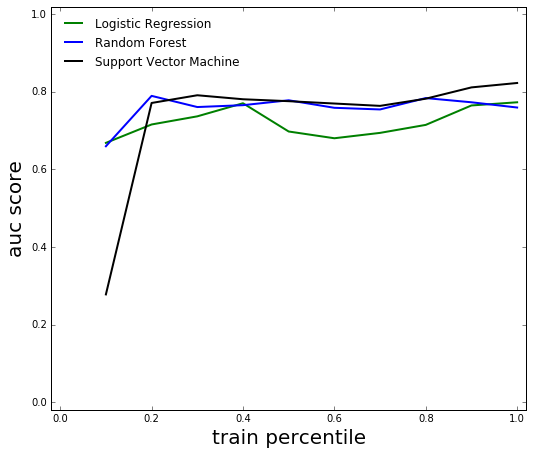

In [18]:
#plot learning curve
plt.subplots_adjust(left=0.1, bottom=0.1, right=1.2, top=1.5, wspace=0.2, hspace=0.2)
plt.xlabel("train percentile", fontsize=20)
plt.ylabel("auc score", fontsize=20)
plt.xlim(-0.02, 1.02)
plt.ylim(-0.02, 1.02)
plt.plot(perc, auc_scores['lr'], c='g', linewidth=2.0, label="Logistic Regression")
plt.plot(perc, auc_scores['rf'], c='b', linewidth=2.0, label="Random Forest")
plt.plot(perc, auc_scores['svm'], c='k', linewidth=2.0, label="Support Vector Machine")
#plt.plot([0, 1], [0, 1], c='r', linewidth=1.0)
#plt.scatter(randon_fpr, randon_tpr, c='r', s=15, edgecolors='None', alpha=0.5)
plt.legend(loc="upper left", frameon=False)